# Perspective Transformation

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

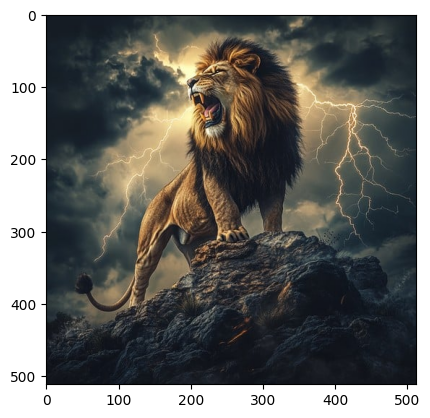

In [3]:
image = cv2.imread("../images/majestic-lion-roaring-stockcake.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)

In [4]:
image_rgb.shape

(512, 512, 3)

In [31]:
rows, cols, _ = image_rgb.shape

input_points = np.float32([[50, 50], [cols - 50, 50], [50, rows-50], [cols-50, rows-50]])

output_points = np.float32([[10, 100], [cols - 100, 50], [100, rows-10], [cols-50, rows-100]])

'''
Trasformation matrix for Perspective trasformation

3x3

a, b, c
d, e, f
g, h, 1

a,b,c is responsioble for horizontal scaling, rotation and tranlation
d,e,f is responsioble for vertical scaling, rotation and tranlation
g,h  : Perspective components that account for depth and skew

'''

M = cv2.getPerspectiveTransform(input_points, output_points)

print(M)

[[ 1.14031781e+00  2.47568457e-01 -5.91129972e+01]
 [-1.08129946e-01  1.11851949e+00  5.22936834e+01]
 [ 3.32866142e-04  2.29766010e-04  1.00000000e+00]]


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

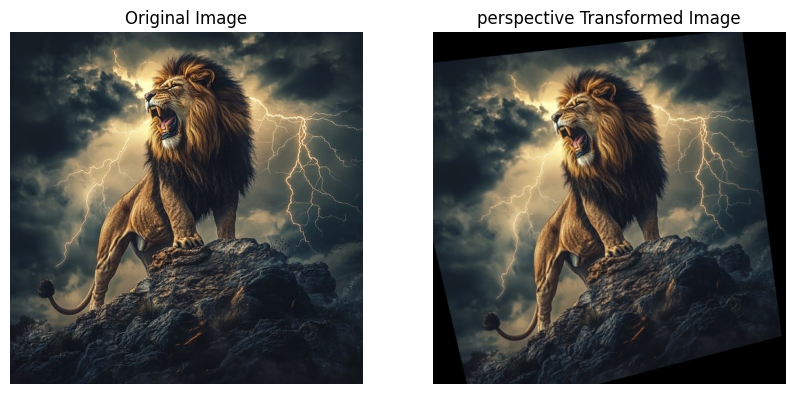

In [32]:
perspective_image = cv2.warpPerspective(image_rgb, M, (cols, rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(perspective_image)

plt.title("perspective Transformed Image")
plt.axis("off")

# Affine transformation

(2, 3)
[[  1.26666667   0.6        -83.33333333]
 [ -0.33333333   1.          66.66666667]]


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

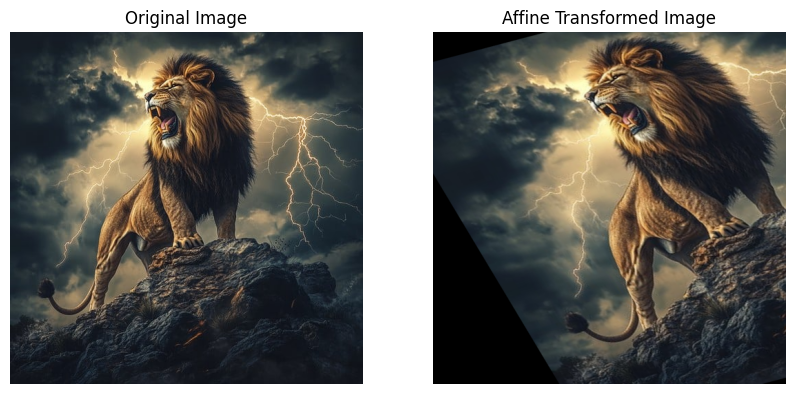

In [10]:
input_points = np.float32([[50,50], [200, 50], [50, 200]])

output_points = np.float32([[10,100], [200, 50], [100, 250]])


M = cv2.getAffineTransform(input_points, output_points)
print(M.shape)
print(M)
affine_image = cv2.warpAffine(image_rgb, M, (cols, rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(affine_image)
plt.title("Affine Transformed Image")
plt.axis("off")

# Rotation

(256, 256)
[[   0.70710678    0.70710678 -106.03867197]
 [  -0.70710678    0.70710678  256.        ]]


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

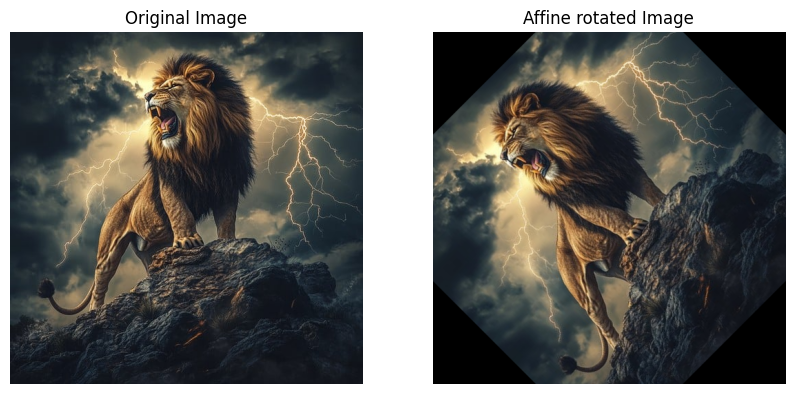

In [ ]:
angle = 45
center = (cols // 2, rows // 2)
print(center)
scale = 1.0

M = cv2.getRotationMatrix2D(center,angle, scale)
print(M)
'''
    M[0, 2] = center_x - center_x * cosθ + center_y * sinθ
    M[1, 2] = center_y - center_x * sinθ - center_y * cosθ

'''
rotated_image = cv2.warpAffine(image_rgb, M, (cols, rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(rotated_image)
plt.title("Affine rotated Image")
plt.axis("off")

(np.float64(-0.5), np.float64(1023.5), np.float64(511.5), np.float64(-0.5))

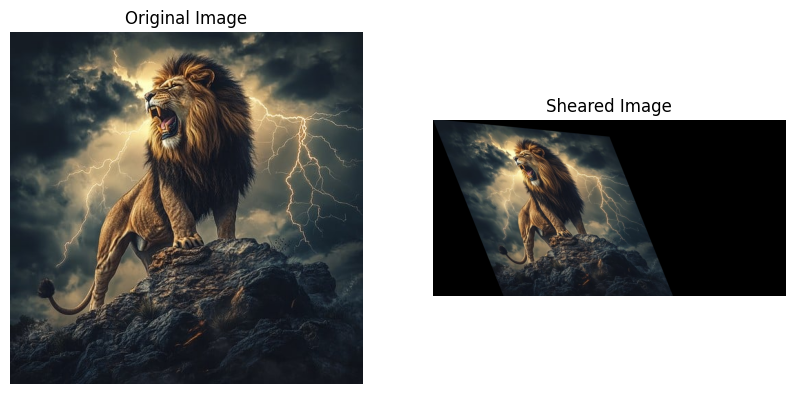

In [23]:
# angle = 45
# center = (cols // 2, rows // 2)
# scale = 1.0

shear_x, shear_y = 0.4, 0.1

M = np.float32([[1, shear_x, 0], 
           [shear_y, 1, 0]])


sheared_image = cv2.warpAffine(image_rgb, M, (cols*2, rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(sheared_image)
plt.title("Sheared Image")
plt.axis("off")

# Translation

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

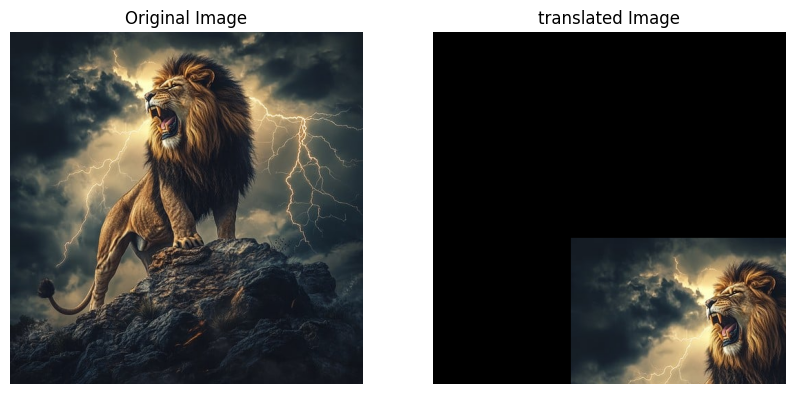

In [13]:
# angle = 45
# center = (cols // 2, rows // 2)
# scale = 1.0

tx, ty = 200, 300

M = np.float32([[1, 0, tx], 
           [0, 1, ty]])


translated_image = cv2.warpAffine(image_rgb, M, (cols, rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(translated_image)
plt.title("translated Image")
plt.axis("off")